In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/titanic.csv")
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [ ]:
data["Survived"] = data["Survived"].map({0: "death", 1: "survival"})
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,death
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,survival
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,survival
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,survival
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,death


### 1. 간단한 시각화

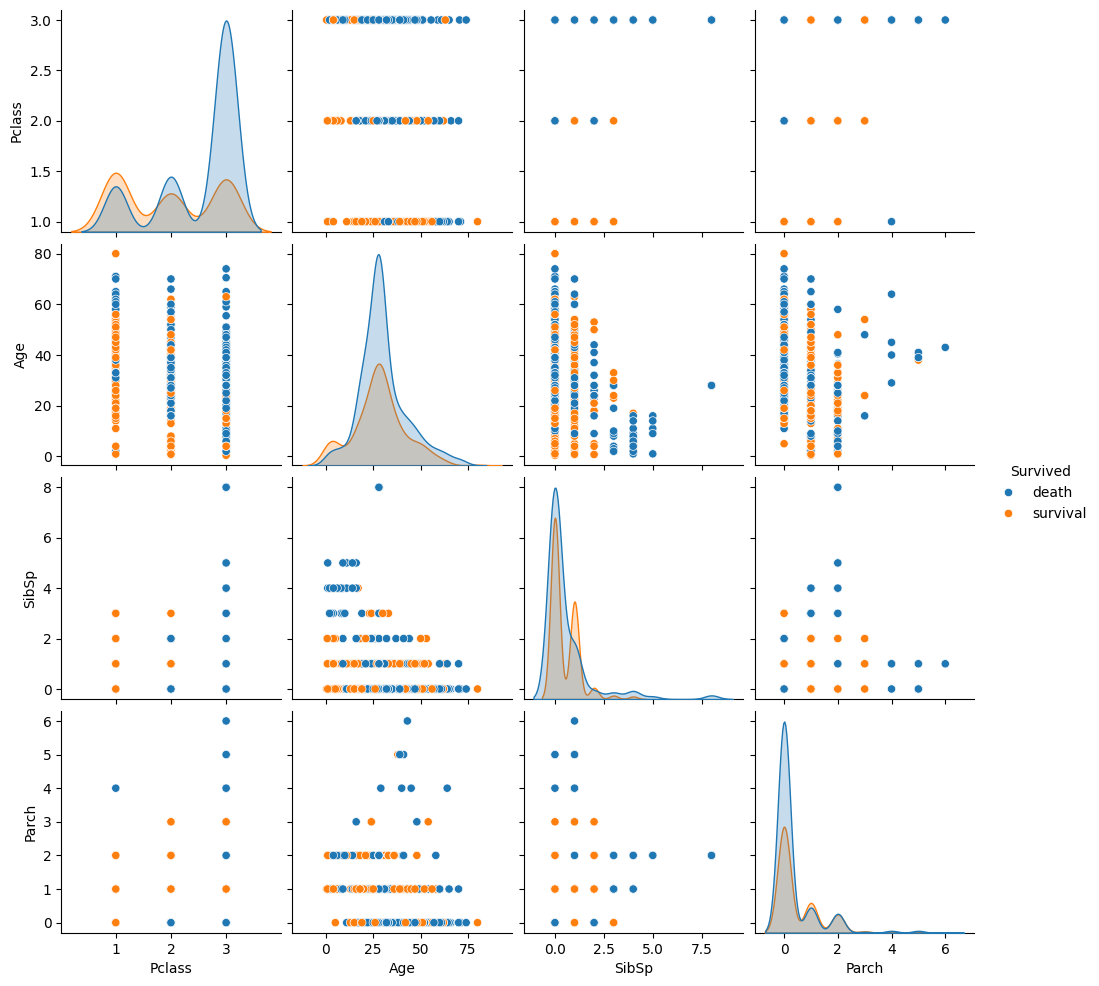

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, hue="Survived")

In [ ]:
corr = data.corr(numeric_only = True)
corr

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.336512,0.081656,0.016824
Age,-0.336512,1.000000,-0.232543,-0.171485
SibSp,0.081656,-0.232543,1.000000,0.414542
Parch,0.016824,-0.171485,0.414542,1.000000


<Axes: >

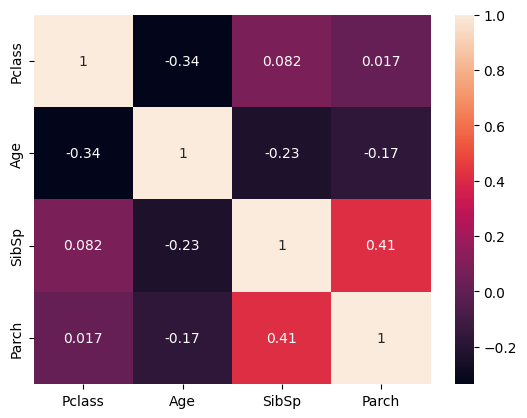

In [ ]:
sns.heatmap(corr, annot = True)

### 2. ML용 데이터 전처리
1. 원핫인코딩: 독립변수의 범주형 변수를 변환하기 - 더미 변수로
2. 이름, 티켓번호 삭제
3. 독립변수/종속변수
4. 훈련세트/테스트세트
5. 표준화

In [ ]:
# pd.get_dummies(data, columns=["Sex", "Embarked"])
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)
data

,Pclass,Name,Age,SibSp,Parch,Ticket,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,death,True,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,survival,False,False,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,survival,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,survival,False,False,True
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,death,True,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",27.0,0,0,211536,death,True,False,True
885,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,survival,False,False,True
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,death,False,False,True
887,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,survival,True,False,False


In [ ]:
X = data.drop("Survived", axis = 1)
y = data["Survived"]

display(X, y)

,Pclass,Name,Age,SibSp,Parch,Ticket,Sex_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,True,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,False,False,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,False,False,True
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,True,False,True
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",27.0,0,0,211536,True,False,True
885,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,False,False,True
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,False,False,True
887,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,True,False,False


0         death
1      survival
2      survival
3      survival
4         death
         ...   
884       death
885    survival
886       death
887    survival
888       death
Name: Survived, Length: 889, dtype: object

In [ ]:
X.drop(["Name", "Ticket"], axis = 1, inplace=True)
display(X)

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,True,False,True
1,1,38.0,1,0,False,False,False
2,3,26.0,0,0,False,False,True
3,1,35.0,1,0,False,False,True
4,3,35.0,0,0,True,False,True
...,...,...,...,...,...,...,...
884,2,27.0,0,0,True,False,True
885,1,19.0,0,0,False,False,True
886,3,28.0,1,2,False,False,True
887,1,26.0,0,0,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(622, 7) (267, 7) (622,) (267,)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

display(X_train_scaled)

array([[-0.37977355, -0.08259692,  0.46509387, ..., -1.33762389,
        -0.30833492, -1.61101698],
       [-0.37977355,  0.55642898, -0.4621125 , ..., -1.33762389,
        -0.30833492,  0.62072592],
       [ 0.81930841, -0.88137931, -0.4621125 , ..., -1.33762389,
        -0.30833492,  0.62072592],
       ...,
       [-1.5788555 ,  0.23691603, -0.4621125 , ...,  0.7475943 ,
        -0.30833492, -1.61101698],
       [ 0.81930841, -0.64174459, -0.4621125 , ...,  0.7475943 ,
        -0.30833492,  0.62072592],
       [-1.5788555 , -0.08259692, -0.4621125 , ...,  0.7475943 ,
        -0.30833492,  0.62072592]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f"dt score(train) = {round(dt.score(X_train, y_train), 2)}%")
print(f"dt score(test) = {round(dt.score(X_test, y_test), 2)}%")

dt score(train) = 0.94%
dt score(test) = 0.78%


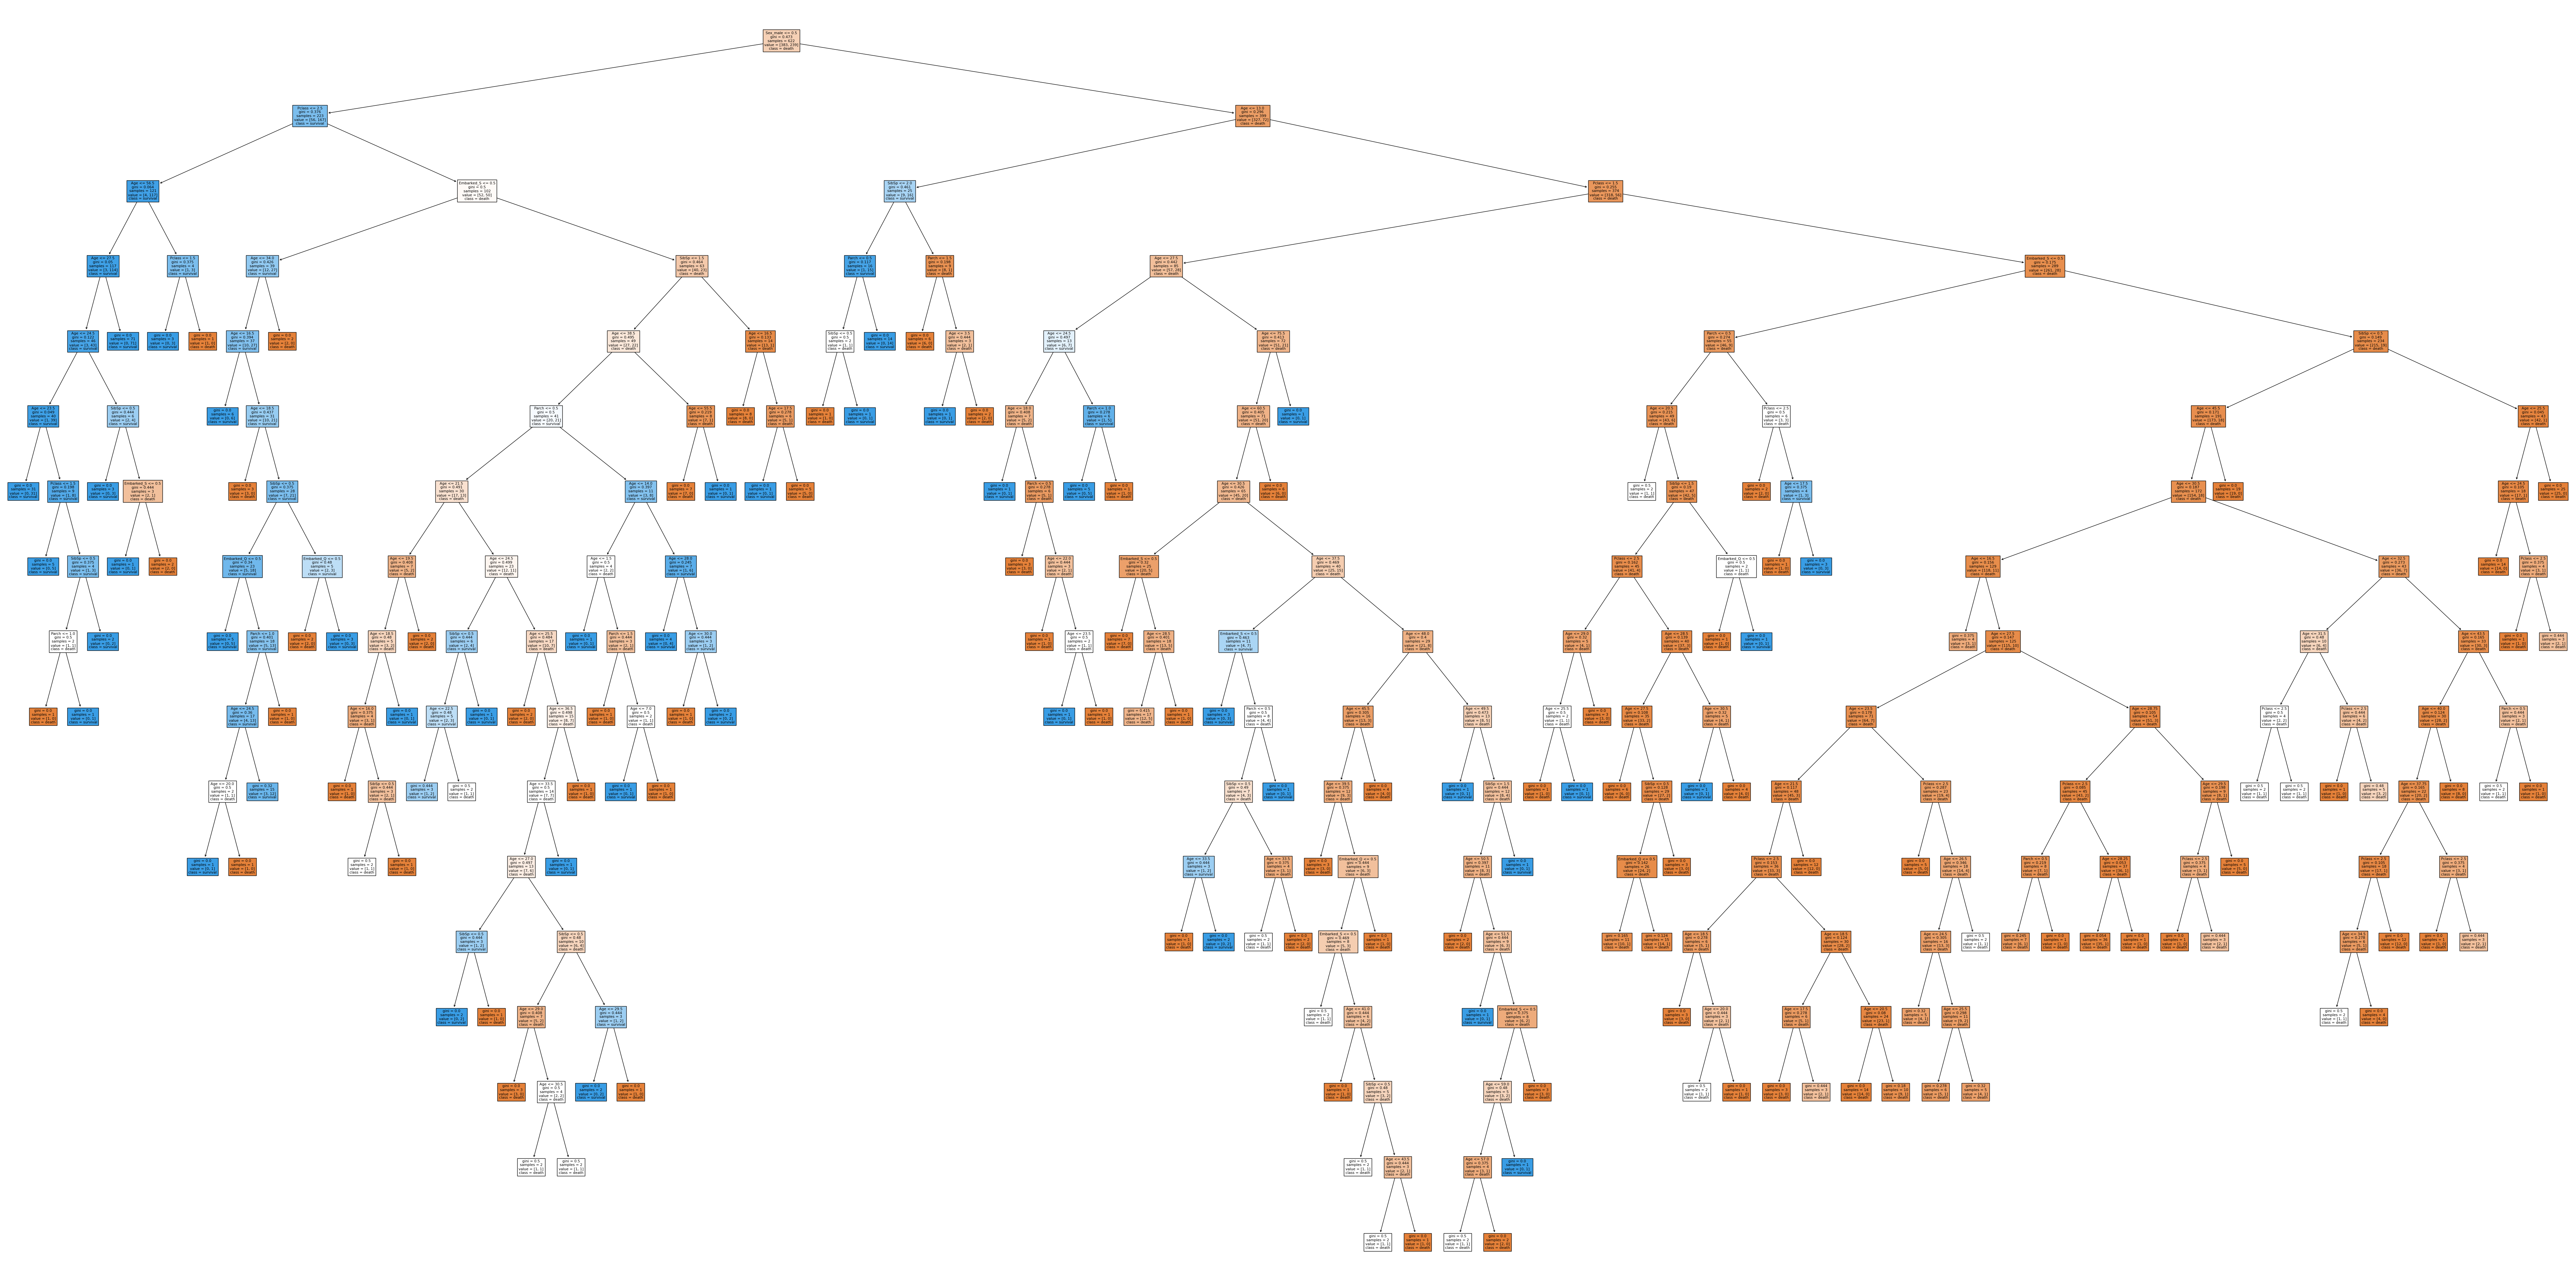

In [ ]:
plt.figure(figsize=(100, 50))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       death       0.80      0.86      0.83       166
    survival       0.74      0.64      0.69       101

    accuracy                           0.78       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267

